In [1]:
%matplotlib inline


Map tile acquisition
--------------------

Demonstrates cartopy's ability to draw map tiles which are downloaded on
demand from the Stamen tile server. Internally these tiles are then combined
into a single image and displayed in the cartopy GeoAxes.




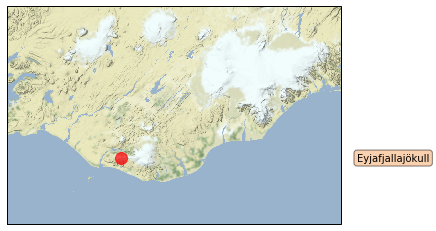

In [3]:
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt


def main():
    # Create a Stamen terrain background instance.
    stamen_terrain = cimgt.Stamen('terrain-background')

    fig = plt.figure()

    # Create a GeoAxes in the tile's projection.
    ax = fig.add_subplot(1, 1, 1, projection=stamen_terrain.crs)

    # Limit the extent of the map to a small longitude/latitude range.
    ax.set_extent([-22, -15, 63, 65], crs=ccrs.Geodetic())

    # Add the Stamen data at zoom level 8.
    ax.add_image(stamen_terrain, 8)

    # Add a marker for the Eyjafjallajökull volcano.
    ax.plot(-19.613333, 63.62, marker='o', color='red', markersize=12,
            alpha=0.7, transform=ccrs.Geodetic())

    # Use the cartopy interface to create a matplotlib transform object
    # for the Geodetic coordinate system. We will use this along with
    # matplotlib's offset_copy function to define a coordinate system which
    # translates the text by 25 pixels to the left.
    geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
    text_transform = offset_copy(geodetic_transform, units='dots', x=-25)

    # Add text 25 pixels to the left of the volcano.
    ax.text(-19.613333, 63.62, u'Eyjafjallajökull',
            verticalalignment='center', horizontalalignment='right',
            transform=text_transform,
            bbox=dict(facecolor='sandybrown', alpha=0.5, boxstyle='round'))
    plt.show()


if __name__ == '__main__':
    main()